# **FANG Stock Analysis**

## **I. Introduction**

In [92]:
# imports datetime for picking beginning and end dates for the analysis
from datetime import datetime
# imports the get_historical_data from iexfinance to get historical data of stock prices
from iexfinance.stocks import get_historical_data
# imports pandas for dataframe manipulation
import pandas as pd
import numpy as np

# Read in the Excel file with the data
df = pd.read_excel('./MVE_assignment_2020_dataset.xlsx')
countries = ['Netherlands','Norway', 'Thailand', 'South Africa']
# Select from df only those for our countries
df = df[df['cntry.name'].apply(lambda x: x in countries)]
# Drop columns that are irrelevant (ISO names of countries)
df = df.drop(['ISO_N3','ISO_C3'],axis=1)
# Set index to increase readability
df.columns = ['Country','Year','Precipitation','Radiation','Average Temp','GDP','GDP per Capita','Population','Land','CPI']
df = df.set_index(['Country','Year'])
# Replace '..' with nans to avoid problems
df = df.replace('..',np.nan).dropna()
data = df.loc['Netherlands']
variables = data.columns

## **II. Data Properties**

Stationarity is where the mean an variance of a time series is not dependent on time. When graphed, it looks like white noise. Due to several problems caused by modeling non-stationary time series, chiefly autocorrelation, you need to check if a time-series is stationary prior to modeling. If it is not stationary, you need to get it there through differencing.

A glance at the graph above shows 4 time series that definitely look non-stationary. However, we need to formally test for it before proceeding.

> ### A. Auto-Correlation Function Analysis of Non-Differenced Variables 

The plots of the Auto-Correlation Functions (ACFs) of the non-differenced variables show that stocks are definitely not stationary. 

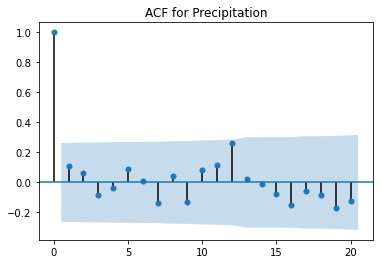

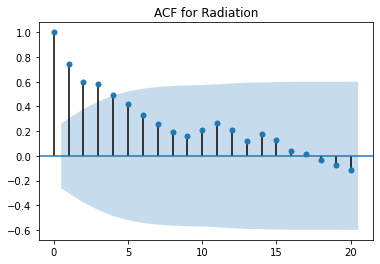

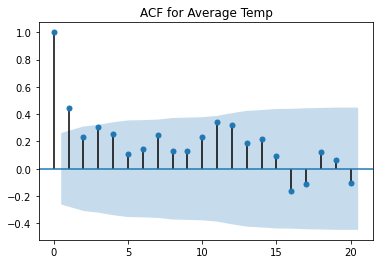

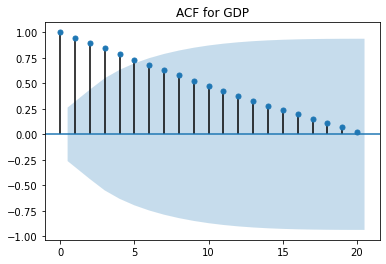

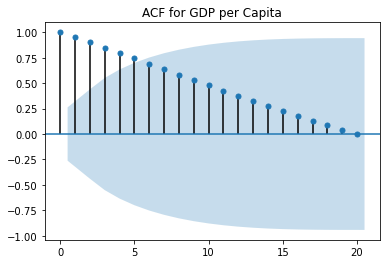

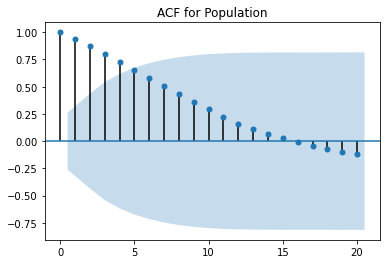

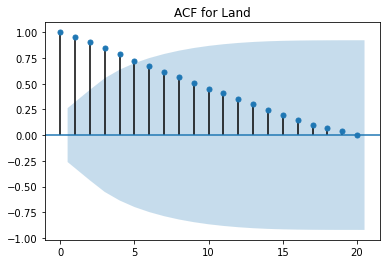

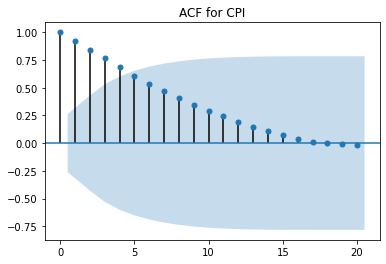

In [81]:
# imports pyplot from matplotlib for plotting functionality
from matplotlib import pyplot
# imports the auto-correlation graphic function
from statsmodels.graphics.tsaplots import plot_acf

# plots the autocorrelation plots for each stock's closing price at 75 lags
for i in variables:
    plot_acf(data.loc[:,i], lags = 20)
    pyplot.title('ACF for %s' % i) 
    pyplot.show()

> ### B. Auto-Correlation Function Analysis of Differenced Variables 

The ACFs of the differenced variables look potentially stationary. This suggests each stock is integrated I(1). Augmented Dickey-Fuller (ADF) tests can confirm this.

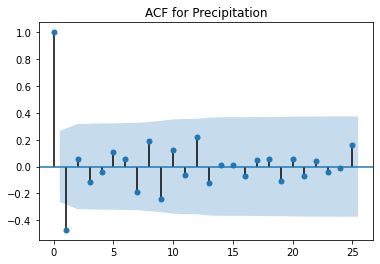

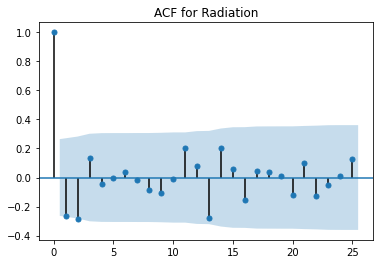

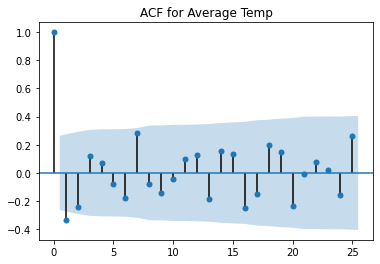

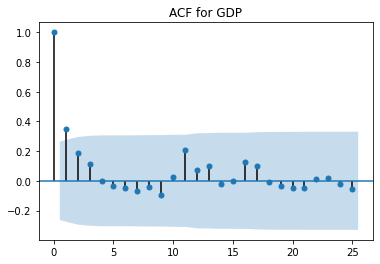

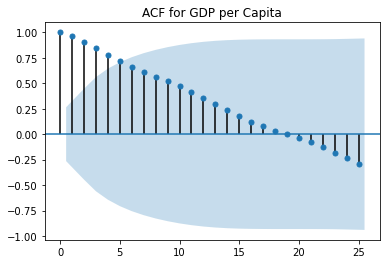

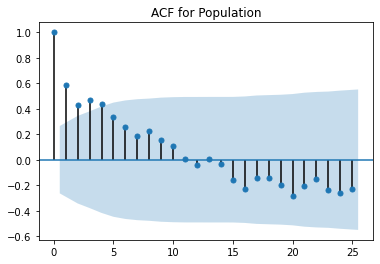

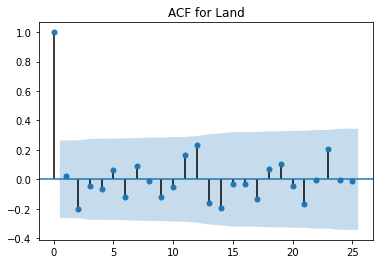

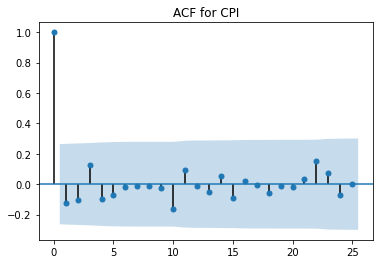

In [82]:
# plots the autocorrelation plots for the difference in each variables value with max 25 lags
for i in variables:
    plot_acf(data.loc[:,i].diff().dropna(), lags = 25)
    pyplot.title('ACF for %s' % i) 
    pyplot.show()

> ### C. Augmented Dickey-Fuller Test for Non-Differenced Variables 

The null hypothesis is the data are non-stationary, so we want low p-values to tell us our data are stationary. That is not what the ADF tests for the non-differenced stock prices are telling us.

In [83]:
# imports the Augmented Dickey-Fuller Test for establishing the order of integration of 
# time series
from statsmodels.tsa.stattools import adfuller

# performs the Augmented Dickey-Fuller Test for all our variables of interest without
# a constant, with a constant, and with a constant and linear trend
for i in variables:
    for j in ['nc', 'c', 'ct']:
        result = adfuller(data.loc[:,i], regression = j)
        print('ADF Statistic with %s for %s: %f' % (j, i, result[0]))
        print('p-value: %f' % result[1])

ADF Statistic with nc for Precipitation: -0.130106
p-value: 0.639349
ADF Statistic with c for Precipitation: -6.556439
p-value: 0.000000
ADF Statistic with ct for Precipitation: -6.492797
p-value: 0.000000
ADF Statistic with nc for Radiation: -0.973488
p-value: 0.298785
ADF Statistic with c for Radiation: -2.771780
p-value: 0.062419
ADF Statistic with ct for Radiation: -5.031463
p-value: 0.000180
ADF Statistic with nc for Average Temp: 1.655795
p-value: 0.976541
ADF Statistic with c for Average Temp: -4.137231
p-value: 0.000840
ADF Statistic with ct for Average Temp: -5.870974
p-value: 0.000004
ADF Statistic with nc for GDP: 3.550286
p-value: 0.999995
ADF Statistic with c for GDP: 1.530996
p-value: 0.997635
ADF Statistic with ct for GDP: -1.769377
p-value: 0.719334
ADF Statistic with nc for GDP per Capita: -0.418645
p-value: 0.529230
ADF Statistic with c for GDP per Capita: -5.672797
p-value: 0.000001
ADF Statistic with ct for GDP per Capita: -1.528081
p-value: 0.819325
ADF Statistic w

> ### D. Augmented Dickey-Fuller Test for Differenced Variables 

These ADF test results tell us the differenced stock prices are stationary, with extremely high statistical signficicance.

The output of the ADF tests for the non-differenced and differenced strongly support the hypothesis that the stocks are integrated I(1). These stock prices need to be differenced once prior to modeling. Many time series packages for integrated time series models do this automatically.

In [84]:
# performs the Augmented Dickey-Fuller Test for all our variables of interest without
# a constant, with a constant, and with a constant and linear trend
for i in variables:
    for j in ['nc', 'c', 'ct']:
        result = adfuller(data.loc[:,i].diff().dropna(), regression = j)
        print('ADF Statistic with %s for %s: %f' % (j, i, result[0]))
        print('p-value: %f' % result[1])

ADF Statistic with nc for Precipitation: -4.619912
p-value: 0.000006
ADF Statistic with c for Precipitation: -4.540057
p-value: 0.000166
ADF Statistic with ct for Precipitation: -4.937554
p-value: 0.000267
ADF Statistic with nc for Radiation: -8.409860
p-value: 0.000000
ADF Statistic with c for Radiation: -8.450817
p-value: 0.000000
ADF Statistic with ct for Radiation: -8.403254
p-value: 0.000000
ADF Statistic with nc for Average Temp: -8.833460
p-value: 0.000000
ADF Statistic with c for Average Temp: -4.216606
p-value: 0.000618
ADF Statistic with ct for Average Temp: -4.109048
p-value: 0.006117
ADF Statistic with nc for GDP: -2.210087
p-value: 0.026037
ADF Statistic with c for GDP: -4.982091
p-value: 0.000024
ADF Statistic with ct for GDP: -5.503858
p-value: 0.000023
ADF Statistic with nc for GDP per Capita: -2.873812
p-value: 0.003972
ADF Statistic with c for GDP per Capita: -0.704759
p-value: 0.845513
ADF Statistic with ct for GDP per Capita: -4.792102
p-value: 0.000484
ADF Statisti

## **III. Granger Causality**

Establishing causality in observational data is notoriously difficult. Granger causality is a lower bar. It simply says that if previous values of X can predict future values of y, then X Granger causes y. It is performed by estimating the regression of the lagged values of X on y and performing an F-test. If the p-value is small enough, you reject the null hypothesis that all the coefficients of the lagged values of X are 0. In plain English, small p-values say that the lagged Xs have predictive power on future y, with a corresponding level of confidence.

The output below says the closing price of FB has predictive power on the closing price of AMZN at the p = 0.10 significance level, NFLX on AMZN at the p = 0.05 significance level, and FB on GOOGL at the p = 0.01 significance level. Given the results of multi-directional Grange causality, VEC modeling seems a plausible choice.

In [89]:
# imports the permutation function to generate all permutations of 2 of the FANG stocks
from itertools import permutations
# imports test for Granger Causality (does variable x have value in predicting y)
from statsmodels.tsa.stattools import grangercausalitytests

# creates a list of tuples containing the permutations of length 2 of the FANG stocks
var_perms = list(permutations(variables, 2))
granger_df = pd.DataFrame(index=variables, columns=variables)
# loops through the list of stock permutations
for i in range(len(var_perms)):
    # converts the tuple to a list so it can be passed to the dataframe for column selection
    temp_list = list(var_perms[i])
    # creates a temporary dataframe of just the two variables
    temp_df = data[temp_list].diff().dropna()
    # prints which permutation is being tested for interpretability
    print('Does a lag of ' + temp_list[1] + ' predict ' + temp_list[0])
    # prints the results of a Granger Causality test for each permutation with 1 lage
    granger_output = grangercausalitytests(temp_df, maxlag = 1, addconst = True, verbose = True)
    # leaves two spaces for readability
    granger_df.loc[temp_list[0],temp_list[1]] = granger_output[1][0]['ssr_chi2test'][1]
    
    print('')
    print('')

Does a lag of Radiation predict Precipitation

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0437  , p=0.1589  , df_denom=51, df_num=1
ssr based chi2 test:   chi2=2.1639  , p=0.1413  , df=1
likelihood ratio test: chi2=2.1216  , p=0.1452  , df=1
parameter F test:         F=2.0437  , p=0.1589  , df_denom=51, df_num=1


Does a lag of Average Temp predict Precipitation

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3140  , p=0.0429  , df_denom=51, df_num=1
ssr based chi2 test:   chi2=4.5678  , p=0.0326  , df=1
likelihood ratio test: chi2=4.3849  , p=0.0363  , df=1
parameter F test:         F=4.3140  , p=0.0429  , df_denom=51, df_num=1


Does a lag of GDP predict Precipitation

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0973  , p=0.7563  , df_denom=51, df_num=1
ssr based chi2 test:   chi2=0.1030  , p=0.7482  , df=1
likelihood ratio test: chi2=0.1029  , p=0.7483  , df=1
parameter F test:         F=0.097

ssr based F test:         F=0.3672  , p=0.5472  , df_denom=51, df_num=1
ssr based chi2 test:   chi2=0.3888  , p=0.5329  , df=1
likelihood ratio test: chi2=0.3874  , p=0.5337  , df=1
parameter F test:         F=0.3672  , p=0.5472  , df_denom=51, df_num=1


Does a lag of CPI predict GDP per Capita

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5402  , p=0.2203  , df_denom=51, df_num=1
ssr based chi2 test:   chi2=1.6307  , p=0.2016  , df=1
likelihood ratio test: chi2=1.6066  , p=0.2050  , df=1
parameter F test:         F=1.5402  , p=0.2203  , df_denom=51, df_num=1


Does a lag of Precipitation predict Population

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5512  , p=0.4612  , df_denom=51, df_num=1
ssr based chi2 test:   chi2=0.5836  , p=0.4449  , df=1
likelihood ratio test: chi2=0.5805  , p=0.4461  , df=1
parameter F test:         F=0.5512  , p=0.4612  , df_denom=51, df_num=1


Does a lag of Radiation predict Population

Granger 

In [98]:
granger_output[1][1][0].params[0]

-0.12291215583180869

## **IV. Johansen Cointegration**

For VEC modeling to be appropriate to model these stocks, Π (the vector of loading coefficients times the vector of error-correction coefficients that constitutes the error correction term in a VECM) times the column vector of dependent variables must be ~I(0) because all other terms on the right and left of the equation are ~I(0). For this to be true, Πx ⃑ = 0 must be true, where x ⃑ is a column vector of the dependent variables because change is 0 in equilibrium and there is equilibrium in the long-run. If the rank of Π is 0, then Π is the null matrix. If the rank is equal to the number of dependent variables, then x ⃑ = 0 must equal zero for the relationship to hold. In either case, there are no cointegrating vectors and there is no long-run relationship between the variables. If the rank of Π is greater than 0 and less than the number of dependent variables, there is a cointegrated relationship between the variables.

I used Johansen's Trace Test to establish cointegration. The null hypothesis is the rank of matrix Π is i and the alternative hypothesis is the rank of Π is equal to k, the number of endogenous variables, where i starts at 0 and proceeds sequentially to k.

The results of this test are that there is 1 cointegrating relationship between the FANG stocks at 1, 3, and 4 lags during the sample period at the 95% significance level. VEC modeling is appropriate to modeling these stocks.

In [10]:
# imports the coint_johansen function to test for cointegration as a prerequisite for VEC 
# modeling
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# uses https://nbviewer.jupyter.org/github/mapsa/seminario-doc-2014/blob/master/cointegration-
# example.ipynb to create functions to return the number of cointegrating vectors based 
# on the Trace version if the Johansen Cointegration Test
def johansen_trace(y, p):
        N, l = y.shape
        joh_trace = coint_johansen(y, 0, p)
        r = 0
        for i in range(l):
            if joh_trace.lr1[i] > joh_trace.cvt[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        joh_trace.r = r

        return joh_trace

# loops through 1 to 10 lags of trading days trading days
for i in range(1, 11): 
    # tests for cointegration at i lags
    joh_trace = johansen_trace(fang[closing], i)
    # prints the results
    print('Using the Trace Test, there are', joh_trace.r, '''cointegrating vectors at 
    %s lags between the FANG stocks''' % i)
    # prints a space for readability
    print()

Using the Trace Test, there are 0 cointegrating vectors at 
    1 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    2 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    3 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    4 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    5 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    6 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    7 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    8 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    9 lags between the FANG stocks

Using the Trace Test, there are 0 cointegrating vectors at 
    10 lags between the FANG stocks



## **V. VECM Estimation and Analysis**

The loading coefficients (alphas) are the speed of adjustment to the long-run relationship. They are the percentage of disequilibrium from the long-run equilibrium that disapates in one period. The alphas for the closing price of FB and NFLX are not statistically significant. The significance of the alpha for AMZN is ambiguous as it is significant at the 0.10 significance level, but not the 0.05 significance level. The alpha for GOOGL is statistically significant at the 0.05 significance level and estimated at 0.0529. 

This information means FB and NFLX (and possibly AMZN) are weakly exogenous to GOOGL (and possibly AMZN). Weak exogeneity is the concept that deviations from the long-run do not directly affect the weakly exogenous variable. The effect comes from the subsequent lags from the non-weakly exogenous variables. The lags of GOOGL (and possibly AMZN) are the drivers of the return to the long-run equilibrium in the weakly exogenous variables.

The beta coefficients are the actual long-run relationship coefficients. The beta for FB is standardized at 1 for ease of interpretation of the other beta coefficients. The beta for GOOGL is -0.4204, which means a 1 dollar increase in GOOGL, leads to a 0.4204 dollar decrease in the closing price of FB in the long-run and 5.29% of this correction occurs within a day. Rearranging which beta is standardized is how you tell how the other stocks affect the stock with the standardized beta.

In [11]:
# imports VECM for VECM modeling
from statsmodels.tsa.vector_ar.vecm import VECM

# estimates the VECM on the closing prices with 4 lags, 1 cointegrating relationship, and
# a constant within the cointegration relationship
fang_vecm = VECM(endog = fang[closing], k_ar_diff = 4, coint_rank = 1, deterministic = 'ci')
fang_vecm_fit = fang_vecm.fit()
fang_vecm_fit.summary()

/home/luuk/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,coef,std err,z,P>|z|,[0.025,0.975]
L1.close_fb,-0.0053,0.040,-0.132,0.895,-0.085,0.074
L1.close_amzn,0.0024,0.005,0.475,0.635,-0.007,0.012
L1.close_nflx,-0.0480,0.019,-2.576,0.010,-0.085,-0.011
L1.close_googl,-0.0087,0.008,-1.024,0.306,-0.025,0.008
L2.close_fb,0.0084,0.040,0.208,0.835,-0.071,0.088
L2.close_amzn,0.0046,0.005,0.920,0.358,-0.005,0.014
L2.close_nflx,0.0311,0.019,1.665,0.096,-0.006,0.068
L2.close_googl,-0.0160,0.009,-1.887,0.059,-0.033,0.001
L3.close_fb,-0.0581,0.040,-1.436,0.151,-0.137,0.021
L3.close_amzn,-0.0112,0.005,-2.228,0.026,-0.021,-0.001


Impulse Response Functions (IRF) show what happens to one variable when you shock another (or the same variable) with an increase of 1 in the previous period. The blue curve shows the effect of the unit shock as the shock becomes less and less recent. The dotted lines represent the 95% confidence interval for the IRF.

A 1 dollar shock to the closing price of GOOGL leads to a drop in the closing price of FB, but the effect of that shock goes to zero over time. The effect of a 1 dollar shock to NFLX initially increases GOOGL's closing price by about 5 cents, but then goes to approximately zero. A unit shock to FB however, persists as do some others like NFLX on AMZN. If all the IRFs were like those, the system would be dynamically unstable, but luckily 0 is within the 95% confidence level of many of our IRFs.

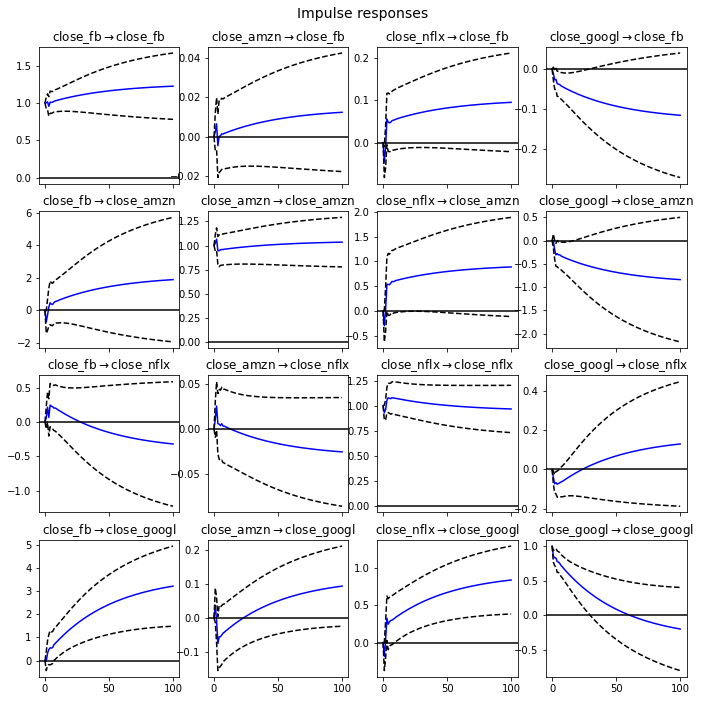

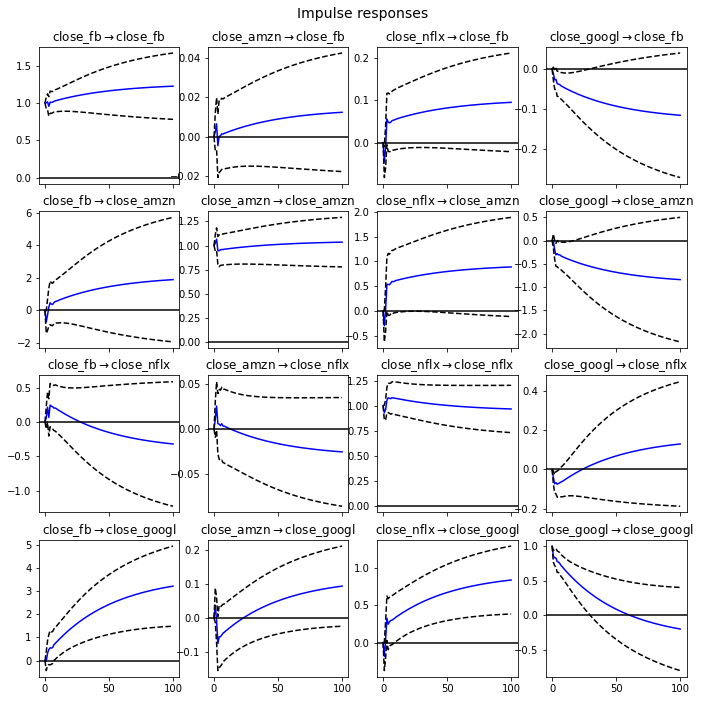

In [12]:
# stores and prints the impulse response functions
irf = fang_vecm_fit.irf(100)
irf.plot(orth = False)

Below is just a graph of the closing stock prices with dynamic forecasting out roughly half a year with error bands.

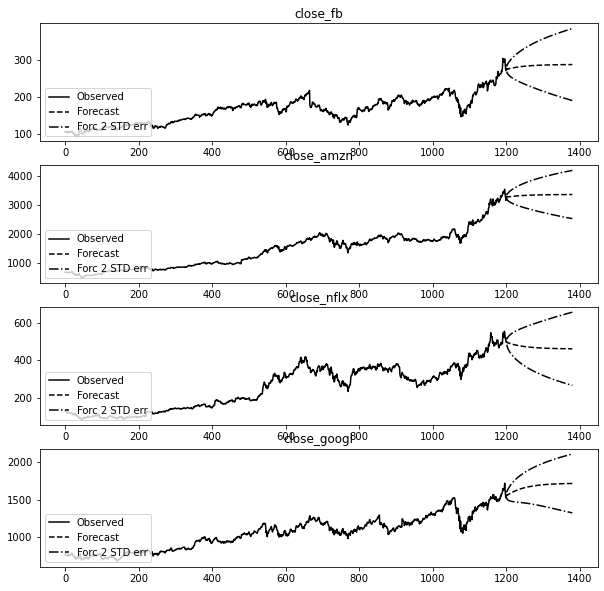

In [13]:
# plots the dynamic forecasts of the FANG stocks out to about half a year (mainly for visual
# purposes)
fang_vecm_fit.plot_forecast(180)